# Extracting Images and Textual Information From Twitter


Extracting tweets from Twitter 


## Introduction

Here we are using twitter API to extract tweets related with brands of our interest and also we are getting the images associated with the tweet. Every tweet is then passed through google's sentimental analysis API and tweet is classified into positive, negative or neutral. Images are passed through object localization and CNN model to identify logos present in the image. All this information is then collected and visualized in tableau (data visualization tool). 

## Importing Essential Libraries

In [ ]:
import tweepy #Library required for Twitter API
import csv
import pandas as pd
import os
import wget
# Google Cloud libraries for sentiment analysis
from google.cloud import language 
from google.cloud.language import enums
from google.cloud.language import types

In [ ]:
import pip
package ='tweepy' #Just replace the package name with any package to install it.
pip.main(['install',package])

### Authentication keys

Here we are defining keys to authenticate with twitter API and start calling API functions to extract tweets for our analysis.

In [21]:
consumer_key = "w7xmRm9BCMZxGQxfOoCXbIAVD"
consumer_secret = "m7IzyeWpT0wEFx88nHCxTqeIaf1kevpka5SEfzEccX5PyLfq"
access_key = "735302761-tJuiMSDnndemYRnNdDSiiXwlDPY1gvIC5ICRJYaU"
access_secret = "HdKj5C1vpoysExllXWGmQhVYjfIhPeFvHzjC0n1b6Crms"

In [25]:
#Creating an empty dataframe to store the information
tweets =pd.DataFrame(columns=["id","created_at","text","media_url","location"])

### Extracting Tweets

We are using tweepy.cursor method to get all the tweets hashtagged with 'dunkin-donuts', also we are only using the tweets that have an image posted along with it. Since images are core part of our application.

In [40]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)
outtweets = [] #initialize master list to hold our ready tweets
for tweet in tweepy.Cursor(api.search,q="#dunkindonuts",count=100, #The q variable holds the hashtag 
                           lang="en",
                           since="2017-04-19").items():
    print(tweet)
    media = tweet.entities.get('media', [])
    if(tweet.entities.get('media',[])) : #This condition appends only those tweets to the list which have image URL's
        media = tweet.entities.get('media')
        outtweets.append([tweet.id_str,tweet.created_at,tweet.text.encode("utf-8"),media[0]['media_url'],tweet.user.location])
        print(media[0]['media_url'])

Status(_api=<tweepy.api.API object at 0x00000250A2515D68>, _json={'created_at': 'Tue Apr 24 05:35:41 +0000 2018', 'id': 988652680313651200, 'id_str': '988652680313651200', 'text': 'Me and @JohnOrtizKehoe  love #DunkinDonuts We even think about getting a #franchise of this lol #sweetoverload… https://t.co/DWAwtDJNsm', 'truncated': True, 'entities': {'hashtags': [{'text': 'DunkinDonuts', 'indices': [29, 42]}, {'text': 'franchise', 'indices': [73, 83]}, {'text': 'sweetoverload', 'indices': [96, 110]}], 'symbols': [], 'user_mentions': [{'screen_name': 'JohnOrtizKehoe', 'name': 'John Ortiz-Kehoe', 'id': 2776889856, 'id_str': '2776889856', 'indices': [7, 22]}], 'urls': [{'url': 'https://t.co/DWAwtDJNsm', 'expanded_url': 'https://twitter.com/i/web/status/988652680313651200', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [112, 135]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Lite</a>', '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Status(_api=<tweepy.api.API object at 0x00000250A2515D68>, _json={'created_at': 'Fri Apr 20 21:12:47 +0000 2018', 'id': 987438954365497345, 'id_str': '987438954365497345', 'text': 'I said cream no sugar, not cream no coffee🤦🏾\u200d♀️ #dunkindonuts is so 🚮 https://t.co/ORDNxKvFTV', 'truncated': False, 'entities': {'hashtags': [{'text': 'dunkindonuts', 'indices': [48, 61]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 987438941660827648, 'id_str': '987438941660827648', 'indices': [70, 93], 'media_url': 'http://pbs.twimg.com/media/DbQWfFsU0AAglAa.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DbQWfFsU0AAglAa.jpg', 'url': 'https://t.co/ORDNxKvFTV', 'display_url': 'pic.twitter.com/ORDNxKvFTV', 'expanded_url': 'https://twitter.com/shauntaplastic/status/987438954365497345/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1536, 'h': 2048, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'medium': {

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Status(_api=<tweepy.api.API object at 0x00000250A2515D68>, _json={'created_at': 'Sun Apr 15 03:55:11 +0000 2018', 'id': 985365896611991552, 'id_str': '985365896611991552', 'text': "RT @lisalbarjas1: @sahluwal @jbellel125 I'm sure that #DunkinDonuts and #McDonalds would be very happy to have new customers. And they have…", 'truncated': False, 'entities': {'hashtags': [{'text': 'DunkinDonuts', 'indices': [54, 67]}, {'text': 'McDonalds', 'indices': [72, 82]}], 'symbols': [], 'user_mentions': [{'screen_name': 'lisalbarjas1', 'name': 'lisalbarjas', 'id': 967468947036626945, 'id_str': '967468947036626945', 'indices': [3, 16]}, {'screen_name': 'sahluwal', 'name': 'Simar', 'id': 2432416417, 'id_str': '2432416417', 'indices': [18, 27]}, {'screen_name': 'jbellel125', 'name': 'Jeanne Latham', 'id': 1965344522, 'id_str': '1965344522', 'indices': [28, 39]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="no

Status(_api=<tweepy.api.API object at 0x00000250A2515D68>, _json={'created_at': 'Sat Apr 14 14:00:22 +0000 2018', 'id': 985155807502372864, 'id_str': '985155807502372864', 'text': '@Starbucks Racial profiling is ALIVE &amp; WELL. #DunkinDonuts 😻 https://t.co/2phHRetssX', 'truncated': False, 'entities': {'hashtags': [{'text': 'DunkinDonuts', 'indices': [49, 62]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Starbucks', 'name': 'Starbucks Coffee', 'id': 30973, 'id_str': '30973', 'indices': [0, 10]}], 'urls': [{'url': 'https://t.co/2phHRetssX', 'expanded_url': 'https://twitter.com/missydepino/status/984539713016094721', 'display_url': 'twitter.com/missydepino/st…', 'indices': [65, 88]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': 30973, 'in_reply_to_user_id_str': '30973', 'in_r

In [41]:
outtweets

[['988651990275317761',
  datetime.datetime(2018, 4, 24, 5, 32, 57),
  b'With every blend you taste, you treat your taste-buds to new enticing flavours. #DunkinDonuts #Coffee #Coffeelove https://t.co/TOPPwnL31e',
  'http://pbs.twimg.com/ext_tw_video_thumb/988651905642631168/pu/img/GpfycHhwli6ZuW9V.jpg',
  ''],
 ['988644733470756864',
  datetime.datetime(2018, 4, 24, 5, 4, 7),
  b'Made to @dunkindonuts &amp; back in one piece safely with fresh air \xf0\x9f\x8d\xa9\xe2\x98\x95\xef\xb8\x8f #Yay #HappyMonday #DunkinDonuts https://t.co/qh1a35o95T',
  'http://pbs.twimg.com/media/DbhfILLU8AA5OxO.jpg',
  'Above the clouds '],
 ['988515387221446656',
  datetime.datetime(2018, 4, 23, 20, 30, 8),
  b'.@dunkindonuts names new digital leader: https://t.co/LzCS2Pa6n1 #foodnews #FBN #restaurantnews #DunkinDonuts https://t.co/GVKWSV3POf',
  'http://pbs.twimg.com/media/DbfpgTrW0AAe_5E.jpg',
  'Kansas City, MO'],
 ['988475115439521793',
  datetime.datetime(2018, 4, 23, 17, 50, 7),
  b'(*THROWS PHONE*)!!

## The following dataframe has been made with all the information related to #DunkinDonuts

In [42]:
tweetdf = pd.DataFrame(outtweets,columns = ["ID","Created_at","Text","Media_URL","Location"])
tweetdf    

,ID,Created_at,Text,Media_URL,Location
0,988651990275317761,2018-04-24 05:32:57,"b'With every blend you taste, you treat your t...",http://pbs.twimg.com/ext_tw_video_thumb/988651...,
1,988644733470756864,2018-04-24 05:04:07,b'Made to @dunkindonuts &amp; back in one piec...,http://pbs.twimg.com/media/DbhfILLU8AA5OxO.jpg,Above the clouds
2,988515387221446656,2018-04-23 20:30:08,b'.@dunkindonuts names new digital leader: htt...,http://pbs.twimg.com/media/DbfpgTrW0AAe_5E.jpg,"Kansas City, MO"
3,988475115439521793,2018-04-23 17:50:07,b'(*THROWS PHONE*)!!! \xf0\x9f\x98\xad\xf0\x9f...,http://pbs.twimg.com/media/DbfE3mKUwAMxif1.jpg,"⚜⚜⚜New Orleans, LA⚜⚜⚜"
4,988401438912073728,2018-04-23 12:57:21,b'Breakfast stop\xf0\x9f\x8d\xa9\xf0\x9f\xa5\x...,http://pbs.twimg.com/media/DbeBqdZUQAEYuuR.jpg,"Alabama, USA"
5,988386108923891712,2018-04-23 11:56:26,b'BigMouth Inc The Prescription Coffee Mug htt...,http://pbs.twimg.com/media/Dbdz7WmVMAAfwQP.jpg,
6,988381212132683776,2018-04-23 11:36:58,"b""I \xe2\x99\xa5\xef\xb8\x8f Boston's @dunkind...",http://pbs.twimg.com/media/DbdveYOWAAAcSBw.jpg,
7,988218341629267969,2018-04-23 00:49:47,b'@RedSox my Dunkies is stepping up their game...,http://pbs.twimg.com/media/DbbbVoOVwAA8kGo.jpg,"Boston, MA"
8,988171056614662144,2018-04-22 21:41:53,"b'This was #EspeciallyGood today, @dunkindonut...",http://pbs.twimg.com/media/DbawTzsWAAQTGrI.jpg,"Alabama, USA"
9,988077239920185344,2018-04-22 15:29:06,b'Spring Fling from #DunkinDonuts is what I ne...,http://pbs.twimg.com/media/DbZbAPfX4AImZAE.jpg,"Chicago, Illinois"


### Tweet Sentiments

We are using google language API to get the sentiments of all the tweets. Google API returns a score between -1 and 1, we are then categorizing these tweets into 3 classes i.e. positive, negative and neutral. These data is collected to perform a demographical sentimental analysis.

In [43]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="h5 file/My First Project-6eb459797ee1.json"
# Instantiates a client
client = language.LanguageServiceClient()

In [44]:
a=tweetdf['Text']

In [45]:
senti=[] #Creating an empty list to store the sentiment of every text

## Parsing every textual part of the dataframe through Google Cloud NLP API to get the sentiment score.

In [46]:
for i in a:
    text = i
    #clean_tweet(i)
    document = types.Document(
    content=text,
    type=enums.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    print('Text: {}'.format(text))
    print('Sentiment: {}, {}'.format(sentiment.score, sentiment.magnitude))
    if(sentiment.score >= -1.0 and sentiment.score < 0.0):
        score='negative'
    elif(sentiment.score == 0.0):
        score='neutral'
    else:
        score='positive'
    senti.append(score)

Text: b'With every blend you taste, you treat your taste-buds to new enticing flavours. #DunkinDonuts #Coffee #Coffeelove https://t.co/TOPPwnL31e'
Sentiment: 0.5, 1.0
Text: b'Made to @dunkindonuts &amp; back in one piece safely with fresh air \xf0\x9f\x8d\xa9\xe2\x98\x95\xef\xb8\x8f #Yay #HappyMonday #DunkinDonuts https://t.co/qh1a35o95T'
Sentiment: 0.8999999761581421, 0.8999999761581421
Text: b'.@dunkindonuts names new digital leader: https://t.co/LzCS2Pa6n1 #foodnews #FBN #restaurantnews #DunkinDonuts https://t.co/GVKWSV3POf'
Sentiment: 0.30000001192092896, 0.30000001192092896
Text: b'(*THROWS PHONE*)!!! \xf0\x9f\x98\xad\xf0\x9f\x98\xad\xf0\x9f\x98\xad\xf0\x9f\x98\xad\xf0\x9f\x98\xad\xf0\x9f\x98\xad\xf0\x9f\x98\xad\xf0\x9f\x98\xad #DunkinDonuts #Starbucks https://t.co/TJCEAOXrYI'
Sentiment: 0.0, 0.10000000149011612
Text: b'Breakfast stop\xf0\x9f\x8d\xa9\xf0\x9f\xa5\x93\xf0\x9f\xa5\x9a\xf0\x9f\xa7\x80\xf0\x9f\xa5\x90\xe2\x98\x95\xf0\x9f\xa5\xa4 #roadtrip #dunkindonuts @dunkindonuts ht

Text: b'\xe2\x9c\xa8#InitiateStarbucksBoycott \xe2\x9c\xa8\xe2\x9c\xa8\n\xf0\x9f\x99\x84\xf0\x9f\x91\x8b\xf0\x9f\x8f\xbdThe coffee is over-roasted anyway. *Speeds over to #DunkinDonuts \xe2\x98\x95\xef\xb8\x8f\xf0\x9f\x94\xa5 https://t.co/hPPFuIx9KW'
Sentiment: 0.4000000059604645, 0.800000011920929
Text: b'RT @3ishbeirut: Nothing beats the 3 PM coffee from @DDlebanon  cheers #coffee #dunkinadict #DunkinDonuts https://t.co/olMGv1IZvI'
Sentiment: 0.5, 0.5
Text: b'Lol @dunkindonuts did you post this\xf0\x9f\x98\x82\xf0\x9f\x98\x82\xf0\x9f\x98\x82 #DunkinDonuts https://t.co/4ItqVb1agX'
Sentiment: 0.30000001192092896, 0.30000001192092896
Text: b'Is it #DunkinDonuts or is it #Starbucks in a Dunkin cup? \xf0\x9f\xa4\xb7\xf0\x9f\x8f\xbe\xe2\x80\x8d\xe2\x99\x80\xef\xb8\x8f The world may never know. https://t.co/aKyQ1qYTQI'
Sentiment: 0.0, 0.20000000298023224
Text: b"@Dunkin_India Here's a perfect screenshot!\n#DunkinDonuts #ItsFantasTHICK https://t.co/cJpzCeSdRv"
Sentiment: 0.5, 1.0
Text: b'FAS

Text: b'RT @FanGurlDiva: @Starbucks #DunkinDonuts will be getting my business \xe2\x98\x95\xef\xb8\x8f https://t.co/u1mGgCHlmA'
Sentiment: 0.0, 0.0
Text: b'America is going to really start to run for #DunkinDonuts #boycottstarbucks https://t.co/G88mDIhD96'
Sentiment: 0.0, 0.0
Text: b'RT @BlackJulieKnows: Me on my way to #DunkinDonuts  #BoycottStarbucks https://t.co/B1pjNYgSIj'
Sentiment: 0.10000000149011612, 0.10000000149011612
Text: b'Me on my way to #DunkinDonuts  #BoycottStarbucks https://t.co/B1pjNYgSIj'
Sentiment: 0.30000001192092896, 0.30000001192092896
Text: b'RT @FanGurlDiva: @Starbucks #DunkinDonuts will be getting my business \xe2\x98\x95\xef\xb8\x8f https://t.co/u1mGgCHlmA'
Sentiment: 0.0, 0.0
Text: b'RT @FanGurlDiva: @Starbucks #DunkinDonuts will be getting my business \xe2\x98\x95\xef\xb8\x8f https://t.co/u1mGgCHlmA'
Sentiment: 0.0, 0.0
Text: b'RT @FanGurlDiva: @Starbucks #DunkinDonuts will be getting my business \xe2\x98\x95\xef\xb8\x8f https://t.co/u1mGgCHlmA'
Sentiment:

In [47]:
tweetdf['sentiment']=senti

## Appending the sentiment score to the exisiting dataframe and writing to a CSV File. Downloading images to a particular folder.

In [48]:
tweetdf

,ID,Created_at,Text,Media_URL,Location,sentiment
0,988651990275317761,2018-04-24 05:32:57,"b'With every blend you taste, you treat your t...",http://pbs.twimg.com/ext_tw_video_thumb/988651...,,positive
1,988644733470756864,2018-04-24 05:04:07,b'Made to @dunkindonuts &amp; back in one piec...,http://pbs.twimg.com/media/DbhfILLU8AA5OxO.jpg,Above the clouds,positive
2,988515387221446656,2018-04-23 20:30:08,b'.@dunkindonuts names new digital leader: htt...,http://pbs.twimg.com/media/DbfpgTrW0AAe_5E.jpg,"Kansas City, MO",positive
3,988475115439521793,2018-04-23 17:50:07,b'(*THROWS PHONE*)!!! \xf0\x9f\x98\xad\xf0\x9f...,http://pbs.twimg.com/media/DbfE3mKUwAMxif1.jpg,"⚜⚜⚜New Orleans, LA⚜⚜⚜",neutral
4,988401438912073728,2018-04-23 12:57:21,b'Breakfast stop\xf0\x9f\x8d\xa9\xf0\x9f\xa5\x...,http://pbs.twimg.com/media/DbeBqdZUQAEYuuR.jpg,"Alabama, USA",positive
5,988386108923891712,2018-04-23 11:56:26,b'BigMouth Inc The Prescription Coffee Mug htt...,http://pbs.twimg.com/media/Dbdz7WmVMAAfwQP.jpg,,positive
6,988381212132683776,2018-04-23 11:36:58,"b""I \xe2\x99\xa5\xef\xb8\x8f Boston's @dunkind...",http://pbs.twimg.com/media/DbdveYOWAAAcSBw.jpg,,positive
7,988218341629267969,2018-04-23 00:49:47,b'@RedSox my Dunkies is stepping up their game...,http://pbs.twimg.com/media/DbbbVoOVwAA8kGo.jpg,"Boston, MA",positive
8,988171056614662144,2018-04-22 21:41:53,"b'This was #EspeciallyGood today, @dunkindonut...",http://pbs.twimg.com/media/DbawTzsWAAQTGrI.jpg,"Alabama, USA",neutral
9,988077239920185344,2018-04-22 15:29:06,b'Spring Fling from #DunkinDonuts is what I ne...,http://pbs.twimg.com/media/DbZbAPfX4AImZAE.jpg,"Chicago, Illinois",positive


In [18]:
tweetdf.to_csv('dunkin2.csv', sep=',', encoding='utf-8')

In [38]:
newpath = r'bigdata_project1'
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [39]:
download = tweetdf['Media_URL']
for media in download:
    wget.download(media, out=newpath)

100% [..............................................................................] 87519 / 87519

In [15]:
import pandas as pd
starbucks_tweets = pd.read_csv('Twitter data/starbucks.csv')
dunkin_tweets = pd.read_csv('Twitter data/dunkin2.csv')

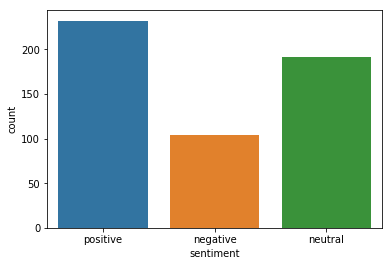

In [16]:
import seaborn as sns
import matplotlib
%matplotlib inline
sns.countplot(starbucks_tweets['sentiment']) #counting total tweets of starbucks(sentiment) that belong to 3 classes

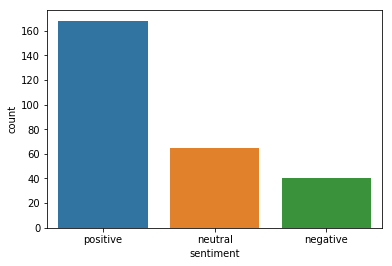

In [17]:
sns.countplot(dunkin_tweets['sentiment']) #counting total tweets of dunkin(sentiment) that belong to 3 classes

Following observation are made by analyzing the tweet sentiments - starbucks received higher umber of positive comments whereas dunkin received very few negative comments. 

MIT License

Copyright (c) 2018, Karan Barai, Gauravi Chaudhari, Pranav Swaminathan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Creative common Attribution 3.0 license

THE WORK (AS DEFINED BELOW) IS PROVIDED UNDER THE TERMS OF THIS CREATIVE COMMONS PUBLIC LICENSE ("CCPL" OR "LICENSE"). THE WORK IS PROTECTED BY COPYRIGHT AND/OR OTHER APPLICABLE LAW. ANY USE OF THE WORK OTHER THAN AS AUTHORIZED UNDER THIS LICENSE OR COPYRIGHT LAW IS PROHIBITED.

BY EXERCISING ANY RIGHTS TO THE WORK PROVIDED HERE, YOU ACCEPT AND AGREE TO BE BOUND BY THE TERMS OF THIS LICENSE. TO THE EXTENT THIS LICENSE MAY BE CONSIDERED TO BE A CONTRACT, THE LICENSOR GRANTS YOU THE RIGHTS CONTAINED HERE IN CONSIDERATION OF YOUR ACCEPTANCE OF SUCH TERMS AND CONDITIONS.

"Work" means the copyrightable work of authorship offered under the terms of this License.